In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_recall_curve
from sklearn import set_config

import warnings
warnings.filterwarnings('ignore')

set_config(display='diagram')

In [ ]:
loan = pd.read_csv("/content/credit_risk_dataset.csv")

Exploratory Data Analysis

In [ ]:
loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
loan.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


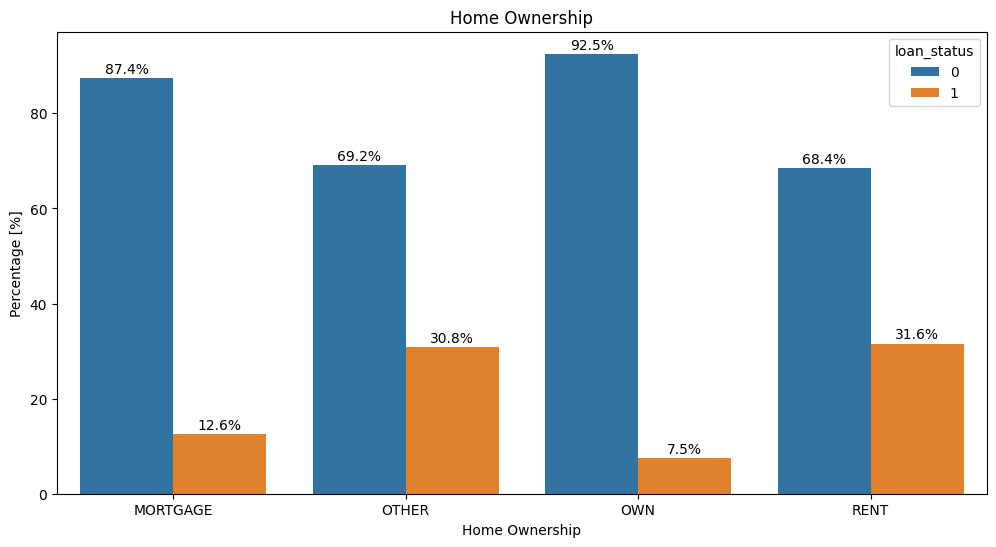

In [ ]:
#Plot Loan Grade Percentage
plt.figure(figsize = (12,6))

home= loan.groupby(['person_home_ownership','loan_status']).size()

# Calculate the total count for each category in person_home_ownership
total_count_home = loan.groupby(['person_home_ownership']).size()

# Calculate the percentage for each group
home_percentage = (home / total_count_home*100).reset_index()
home_percentage.rename(columns={0: 'percentage'}, inplace=True)

# Create a barplot of 'loan_intent' with 'loan_status' as a hue
sns.barplot(x='person_home_ownership', y='percentage', hue='loan_status', data=home_percentage)
plt.title('Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage [%]')

# Add percentage labels to the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center')

plt.show()

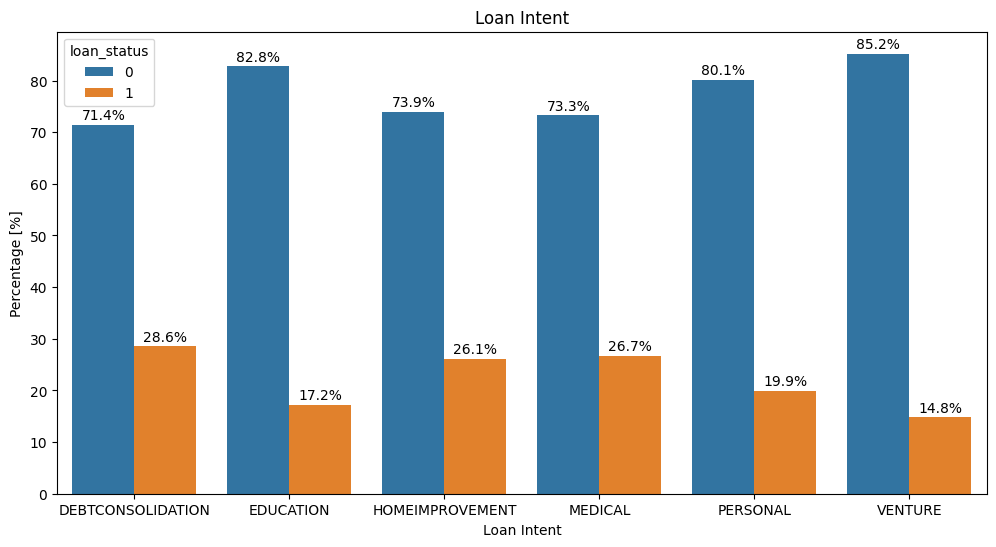

In [ ]:
#Plot Loan Intent Percentage
plt.figure(figsize = (12,6))

intent= loan.groupby(['loan_intent','loan_status']).size()

# Calculate the total count for each category in loan_intent
total_count_intent = loan.groupby(['loan_intent']).size()

# Calculate the percentage for each group
intent_percentage = (intent/ total_count_intent*100).reset_index()
intent_percentage.rename(columns={0: 'percentage'}, inplace=True)

# Create a barplot of 'loan_intent' with 'loan_status' as a hue
sns.barplot(x='loan_intent', y='percentage', hue='loan_status', data=intent_percentage)
plt.title('Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Percentage [%]')

# Add percentage labels to the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center')

plt.show()

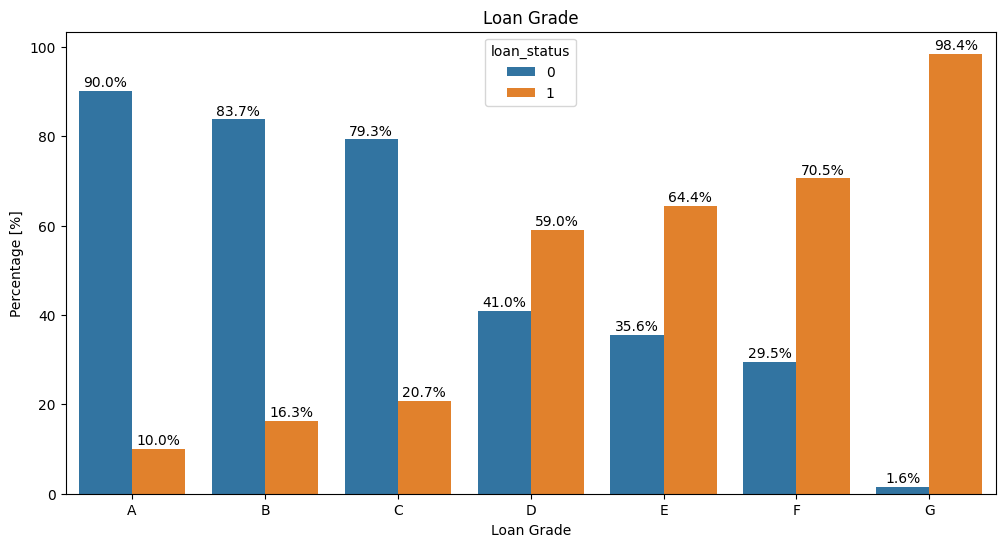

In [ ]:
#Plot Loan Grade Percentage
plt.figure(figsize = (12,6))

grade= loan.groupby(['loan_grade','loan_status']).size()

# Calculate the total count for each category in loan_grade
total_count_grade = loan.groupby(['loan_grade']).size()

# Calculate the percentage for each group
grade_percentage = (grade/ total_count_grade*100).reset_index()
grade_percentage.rename(columns={0: 'percentage'}, inplace=True)

# Create a barplot of 'loan_grade' with 'loan_status' as a hue
sns.barplot(x='loan_grade', y='percentage', hue='loan_status', data=grade_percentage)
plt.title('Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Percentage [%]')

# Add percentage labels to the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center')

plt.show()

Data Cleaning

In [ ]:
loan.isna().sum()
#We will take care of these Null values by imputing them in the pipeline

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
#Count Duplicate rows
loan.duplicated().sum()

165

In [ ]:
#Remove duplicates
loan = loan.drop_duplicates()
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [ ]:
#Heat map Correlation matrix
fig = px.imshow(loan.corr(),x=list(loan.corr().columns),y=list(loan.corr().columns),width=800, height=800)
fig.show()

Correlation between cb_person_cred_hist_length and person_age is 0.86 which is a relatively high value. The plot below shows clearly the linear correlation between the two features. For this reason we choose to drop one of the two features, in particular we drop cb_person_cred_hist_length from the dataset.

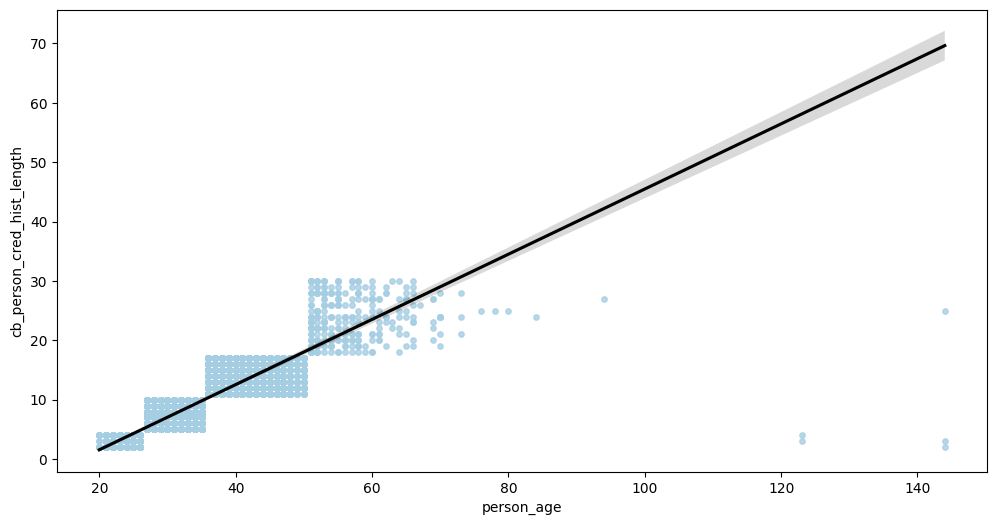

In [ ]:
sns.set_palette('Paired')
plt.figure(figsize = (12,6))
sns.regplot(data=loan, x='person_age', y='cb_person_cred_hist_length', line_kws={'color': 'black'}, scatter_kws={'s': 15})
plt.show()

In [ ]:
#Drop Credit History Length feature
loan = loan.drop(['cb_person_cred_hist_length'], axis=1) #Drop Credit History Length feature

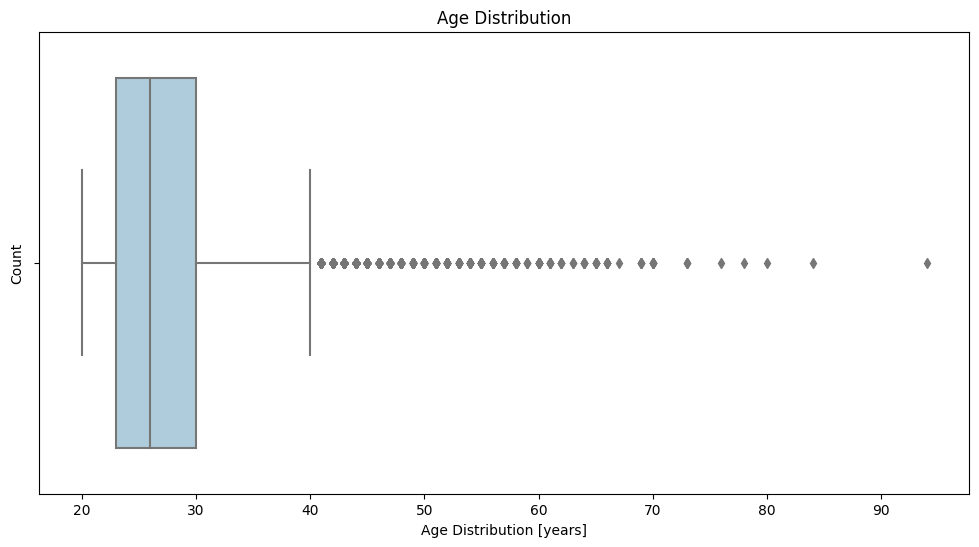

In [ ]:
#Plot Age Distribution boxplot
plt.figure(figsize = (12,6))
sns.boxplot(data=loan, x='person_age', hue='loan_status')
plt.title('Age Distribution')
plt.xlabel('Age Distribution [years]')
plt.ylabel('Count')
plt.show()

In [ ]:
#Drop person having age above 122
loan = loan.drop(loan[loan['person_age'] > 122].index)

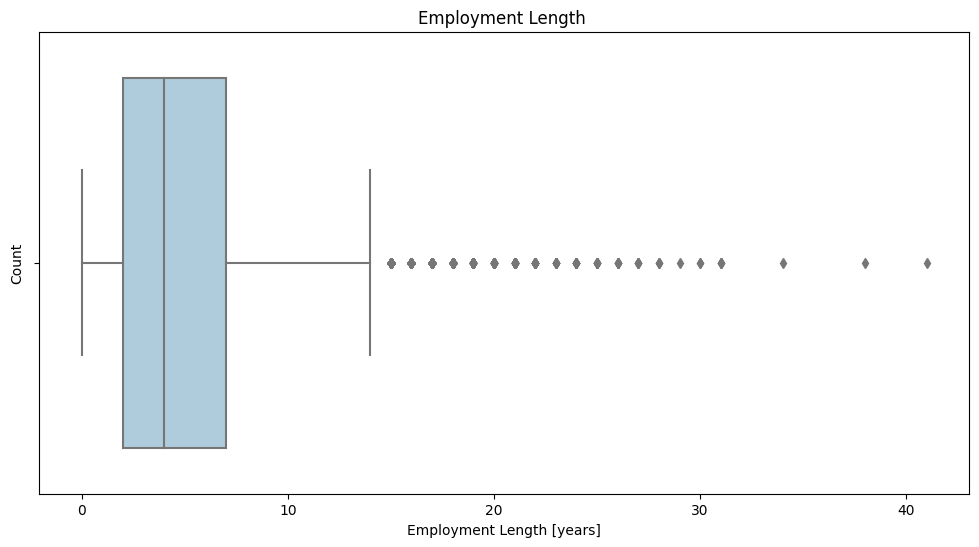

In [ ]:
#Plot Employment length boxplot
plt.figure(figsize = (12,6))
sns.boxplot(data=loan, x='person_emp_length', hue='loan_status')
plt.title('Employment Length ')
plt.xlabel('Employment Length [years]')
plt.ylabel('Count')
plt.show()

In [ ]:
#Drop person employment length above 122 years
loan = loan.drop(loan[loan['person_emp_length'] > 122].index)

Preprocessing

In [ ]:
X = loan.drop('loan_status', axis=1).reset_index(drop=True) # Features
y = loan['loan_status'].reset_index(drop=True) # Target

In [ ]:
#Pipeline definition
categorical_ordinal_pipeline = Pipeline(steps=[("oe", OrdinalEncoder()),("mmscale", MinMaxScaler())])
categorical_nominal_pipeline = Pipeline(steps=[("ohe", OneHotEncoder())])
numerical_pipeline = Pipeline(steps=[("impute", SimpleImputer(strategy="mean")),("scale", RobustScaler())])

In [ ]:
ord_cols = ['loan_grade']
cat_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'] # Select categorical columns
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
            'loan_percent_income'] # Select numerical columns

ct = ColumnTransformer(transformers=[("numerical", numerical_pipeline, num_cols),
                                    ("categorical", categorical_nominal_pipeline, cat_cols),
                                    ("ordinal", categorical_ordinal_pipeline, ord_cols)])

ct

In [ ]:
# Apply train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
X_train_processed = ct.fit_transform(X_train)
X_test_processed = ct.transform(X_test)

In [ ]:
df= pd.DataFrame(X_train_processed)
df.head(5)

Model Evaluation and Selection

Logistic Regression

In [ ]:
#Logistic Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train_processed,y_train)
y_pred_lr = lr.predict(X_test_processed)
print(classification_report(y_test,y_pred_lr))
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print('F1-score average is: %.3f' %(f1_lr))
recall_lr = recall_score(y_test, y_pred_lr, pos_label=1, average='binary')
print('Recall score (class 1) is: %.3f' %(recall_lr))

In [ ]:
#Create and plot confusion matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels=['0','1'])
cm_display_lr.plot()
plt.show()

In [ ]:
#Compute accuracy on the training set
train_accuracy_lr = lr.score(X_train_processed, y_train)
#Compute accuracy on the test set
test_accuracy_lr = lr.score(X_test_processed, y_test)

train_accuracy_lr, test_accuracy_lr

KNN

In [ ]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_processed,y_train)
y_pred_knn = knn.predict(X_test_processed)
print(classification_report(y_test,y_pred_knn))
f1_knn =f1_score(y_test, y_pred_knn, average='weighted')
print('F1-score average is: %.3f' %(f1_knn))
recall_knn = recall_score(y_test, y_pred_knn, pos_label=1, average='binary')
print('Recall score (class 1) is: %.3f' %(recall_knn))

In [ ]:
#Create and plot confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
cm_display_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=['0','1'])
cm_display_knn.plot()
plt.show()

In [ ]:
#Compute accuracy on the training set
train_accuracy_knn = knn.score(X_train_processed, y_train)
#Compute accuracy on the test set
test_accuracy_knn = knn.score(X_test_processed, y_test)

train_accuracy_knn, test_accuracy_knn

Random Forest

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=8, class_weight='balanced_subsample', random_state=42)
rf.fit(X_train_processed,y_train)
y_pred_rf = rf.predict(X_test_processed)
print(classification_report(y_test,y_pred_rf))
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print('F1-score average is: %.3f' %(f1_rf))
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1, average='binary')
print('Recall score (class 1) is: %.3f' %(recall_rf))

In [ ]:
#Create and plot confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=['0','1'])
cm_display_rf.plot()
plt.show()

In [ ]:
#Compute accuracy on the training set
train_accuracy_rf = rf.score(X_train_processed, y_train)
#Compute accuracy on the test set
test_accuracy_rf = rf.score(X_test_processed, y_test)

train_accuracy_rf, test_accuracy_rf

XGBoost

In [ ]:
#XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_processed,y_train)
y_pred_xgb = xgb.predict(X_test_processed)
print(classification_report(y_test,y_pred_xgb))
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print('F1-score average is: %.3f' %(f1_xgb))
recall_xgb = recall_score(y_test, y_pred_xgb, pos_label=1, average='binary')
print('Recall score (class 1) is: %.3f' %(recall_xgb))

In [ ]:
#Create and plot confusion matrix
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_display_xgb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb, display_labels=['0','1'])
cm_display_xgb.plot()
plt.show()

In [ ]:
#Compute accuracy on the training set
train_accuracy_xgb = xgb.score(X_train_processed, y_train)
#Compute accuracy on the test set
test_accuracy_xgb = xgb.score(X_test_processed, y_test)

train_accuracy_xgb, test_accuracy_xgb

Model Optimisation

In [ ]:
#Common Hyperparameters for Randomized Search
n_iter = 10
cv = 5

XGBoost Classifier - Hyperparameter Tuning with Randomized Search

In [ ]:
# Define the search space
random_grid_xgb = {
    "learning_rate": [0.005, 0.01, 0.02, 0.03, 0.05],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "gamma": [0, 0.001, 0.01, 0.1, 0.2, 0.3, 1, 5], #Minimum loss reduction to make a split
    "min_child_weight" : [1, 2, 3, 4],  #Minimum sum of weights of all observations required in a child
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], #subsample ratio of columns when constructing each tree
    "reg_alpha": [0, 1e-2, 0.1, 1], #L1 regularization term on weights
    "reg_lambda": [0, 1e-2, 0.1, 1],  #L2 regularization term on weights
    "scale_pos_weight": [1,2,3,4,5] #It deals with imbalanced datasets. It's calculated as the ratio between bigger class vs smaller class
     }

In [ ]:
# Define random search
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(),
                           param_distributions=random_grid_xgb,
                           n_iter = 50,
                           scoring = 'recall',
                           n_jobs = -1,
                           cv = cv,
                           verbose = 0,
                           random_state = 42)
# Fit grid search
random_search_xgb.fit(X_train_processed, y_train)
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_search_xgb.best_score_:.3f}')
print(f'The best hyperparameters are {random_search_xgb.best_params_}')

In [ ]:
xgb_opti=random_search_xgb.best_estimator_
y_pred_xgb_opti = xgb_opti.predict(X_test_processed)
print(classification_report(y_test,y_pred_xgb_opti))
f1_xgb_opti = f1_score(y_test, y_pred_xgb_opti, average='weighted')
print('F1-score average is: %.3f' %(f1_xgb_opti))
recall_xgb_opti = recall_score(y_test, y_pred_xgb_opti, pos_label=1, average='binary')
print('Recall score (class 1) is: %.3f' %(recall_xgb_opti))

In [ ]:
#Compute accuracy on the training set
train_accuracy_xgb_opti = xgb_opti.score(X_train_processed, y_train)
#Compute accuracy on the test set
test_accuracy_xgb_opti = xgb_opti.score(X_test_processed, y_test)

train_accuracy_xgb_opti, test_accuracy_xgb_opti

In [ ]:
y_score_xgb_opti = xgb_opti.predict_proba(X_test_processed)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score_xgb_opti)

sns.set_palette('tab10')
plt.figure(figsize = (12,6))

#create precision recall curve
plt.plot(recall, precision, color='blue')

#add axis labels to plot
plt.title('Precision-Recall Curve (XGBoost Classifier Tuned)')
plt.ylabel('Precision')
plt.xlabel('Recall')

# Create an array of x-ticks from 0 to 1 with a step of 0.1
x_ticks = np.arange(0, 1.1, 0.1)

# Set the x-ticks and enable the grid lines
plt.xticks(x_ticks)
plt.grid()

#add axis labels to plot
plt.title('Precision-Recall Curve (class 1)')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.show()